In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Data Generate X,Y
def generateDataset(m):
  X = np.random.randn(m)*10
  noise = np.random.randn(m)
  print(X.mean(), X.std())
  y = 2*X+1 + 4*noise
  return X,y


In [ ]:
X,y = generateDataset(100)
print(X.shape,y.shape)

0.34570838152771294 10.147933827366904
(100,) (100,)


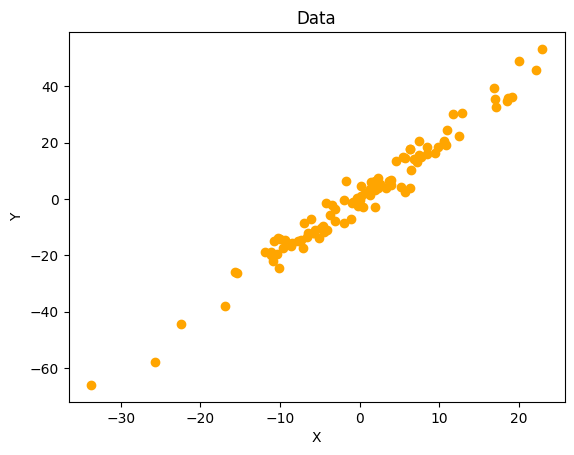

In [ ]:
def plotData(X,y,color="orange", title="Data"):
  plt.title(title)
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.scatter(X,y,c=color)
  plt.show()

plotData(X,y)

In [ ]:
#Data Standardisation or Normalisation
def normaliseData(X):
    X = (X-X.mean())/X.std()
    return X

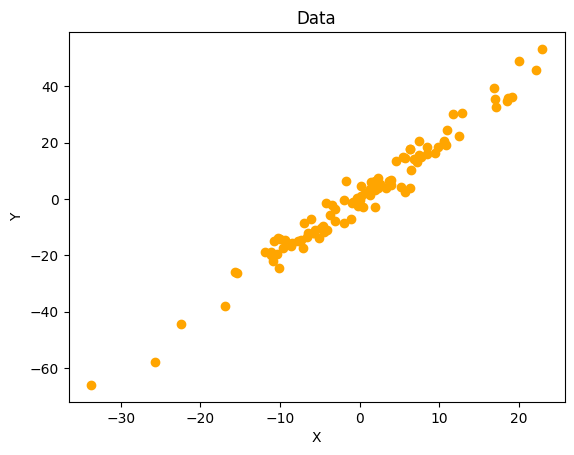

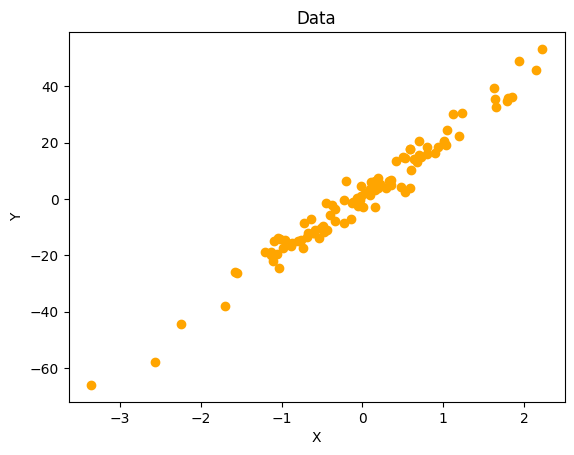

In [ ]:
plotData(X,y)
X = normaliseData(X)
plotData(X,y)

In [ ]:
#Train Test split
#shuffle all the instances
def trainTestSplit(X,y,split=0.8):
    m=X.shape[0]
    data= np.zeros((m,2))

    data[:,0] = X
    data[:,1] = y

    np.random.shuffle(data)

    split = int(m*split)

    XT =  data[:split,0]
    YT = data[:split,1]
    XTest = data[split:,0]
    YTest =data[split:,1]
    return XT,YT,XTest,YTest


In [ ]:
XT,YT,XTest,YTest = trainTestSplit(X,y)

In [ ]:
print(XT.shape,YT.shape)
print(XTest.shape,YTest.shape)

(80,) (80,)
(20,) (20,)


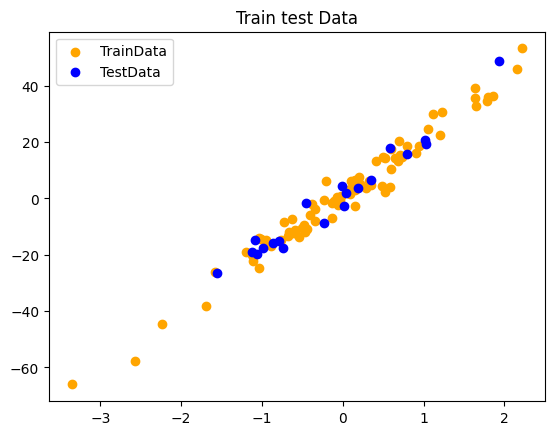

In [ ]:
plt.scatter(XT,YT,color="orange",label="TrainData")
plt.scatter(XTest,YTest,color="blue",label="TestData")
plt.title("Train test Data")
plt.legend()
plt.show()

In [ ]:
#Hypothesis Function
def hypothesis(X,theta):
  return theta[0]+ theta[1]*X

def error(X,y,theta):
  m=X.shape[0]
  e = 0
  for i in range(m):
    y_i = hypothesis(X[i],theta)
    e = e + (y[i] - y_i)**2

  return e/(2*m)

def gradient(X,y,theta):
  m=X.shape[0]
  grad = np.zeros((2,))

  for i in range(m):
    exp = hypothesis(X[i],theta) - y[i]
    grad[0] += (exp)
    grad[1] += (exp)*X[i]
  return grad/m

def train(X,y, learning_rate=0.1):
  theta = np.zeros((2,))

  maxItrs = 100
  error_list = []

  for i in range(maxItrs):
    grad = gradient(X,y,theta)
    error_list.append(error(X,y,theta))
    theta[0] = theta[0] - learning_rate * grad[0]
    theta[1] = theta[1] - learning_rate * grad[1]

  plt.plot(error_list)
  plt.xlabel("Iteration")
  plt.ylabel("Error / loss")
  plt.title("Error vs Iteration")
  plt.show()
  return theta

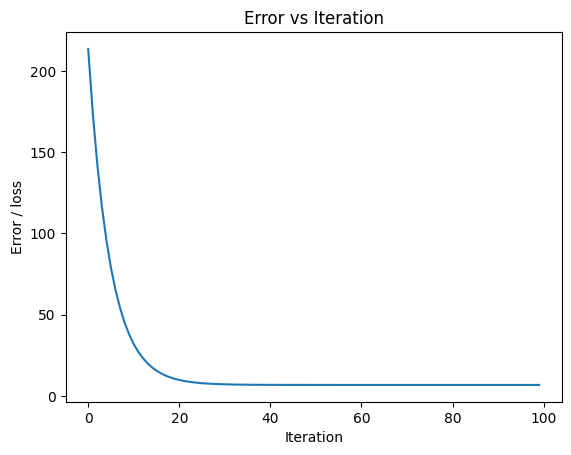

In [ ]:
theta = train(X,y)

In [ ]:
print(theta)

[ 1.3582575  20.29197106]


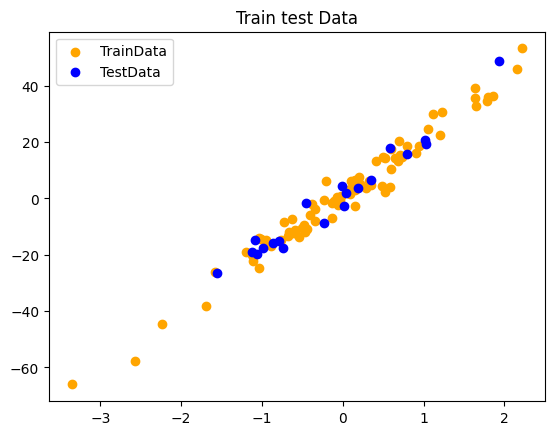

In [ ]:
plt.scatter(XT,YT,color="orange",label="TrainData")
plt.scatter(XTest,YTest,color="blue",label="TestData")
plt.title("Train test Data")
plt.legend()
plt.show()

In [ ]:
def predict(X,theta):
  return hypothesis(X,theta)

In [ ]:
yp = predict(XTest,theta)

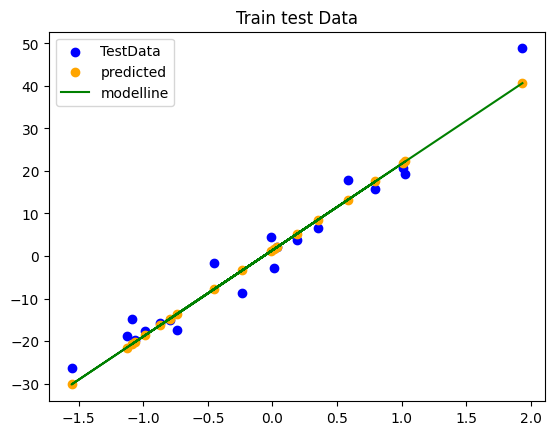

In [ ]:
plt.scatter(XTest,YTest,color="blue",label="TestData")
plt.scatter(XTest,yp,color="orange",label="predicted")
plt.plot(XTest,yp,color="green",label="modelline")
plt.title("Train test Data")
plt.legend()
plt.show()

In [ ]:
YT.shape

(80,)

In [ ]:
#Evaluation

def r2Score(y,yp):
  ymean = y.mean()
  num = np.sum((y-yp)**2)
  denom = np.sum((y-ymean)**2)
  return 1 - num/denom

r2Score(YTest,yp)



0.957976325424462